## 3-Prepare Data

Import the MFR Data:

```python
import numpy as np
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/polymer_reactor.txt'
data = pd.read_csv(url)
data.columns = ['Time','C3=','H2R','Pressure','Level','C2=','Cat','Temp','MFR']
data['lnMFR'] = np.log(data['MFR'].values)
del data['Time']
data = data.dropna() # drop any row with NaN
data.head(10)
```

Run this code to import the data as a DataFrame.

In [1]:
import numpy as np
import pandas as pd
url = 'http://apmonitor.com/pds/uploads/Main/polymer_reactor.txt'
data = pd.read_csv(url)
data.columns = ['Time','C3=','H2R','Pressure','Level','C2=','Cat','Temp','MFR']
data['lnMFR'] = np.log(data['MFR'].values)
del data['Time']
data = data.dropna().reset_index(drop=True) # drop any row with NaN
data.head(10)

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922
5,25362.809,0.150,30.438940,78.293411,32548.566,0.140550,79.061462,3.2,1.163151
6,25642.936,0.150,30.419355,78.568573,42557.902,0.166875,79.565430,3.4,1.223775
7,27009.320,0.150,30.504484,78.852005,45878.480,0.160510,79.390396,3.6,1.280934
8,27307.461,0.150,30.204451,78.931427,49528.848,0.159013,78.511749,3.8,1.335001
9,26623.619,0.150,30.201500,78.574249,43206.711,0.141628,78.461151,3.8,1.335001


There are several graphical techniques to help detect outliers. A box or histogram plot shows outlying points.

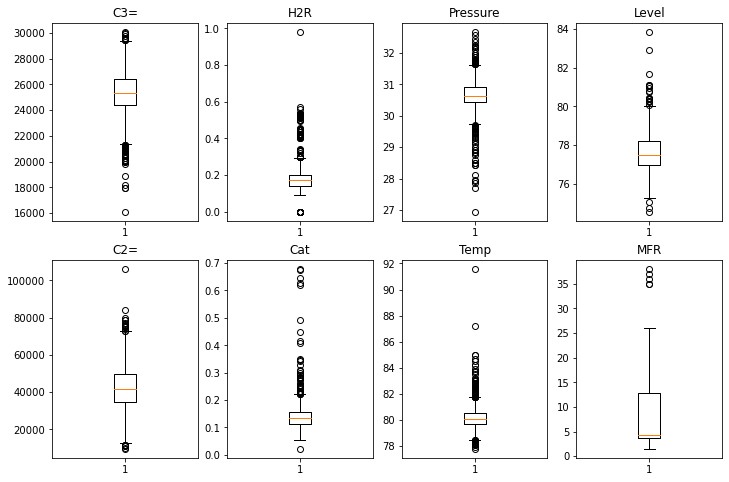

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
for i,c in enumerate(data.columns):
    if i<=7:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

Remove outliers by removing select rows such as with:

```python
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]
```

to keep only values of `H2R` (Hydrogen to Monomer ratio) that are between 0.01 and 0.7.

In [3]:
print(len(data))
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]
data = data[data['C2=']<100000]
data = data[data['MFR']<30]
data = data[data['Temp']<83]
print(len(data))
data.head()

2484
2450


,C3=,H2R,Pressure,Level,C2=,Cat,Temp,MFR,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922


In [4]:
len(data)

2450

Show the boxplot again to verify that the data set does not have outliers.

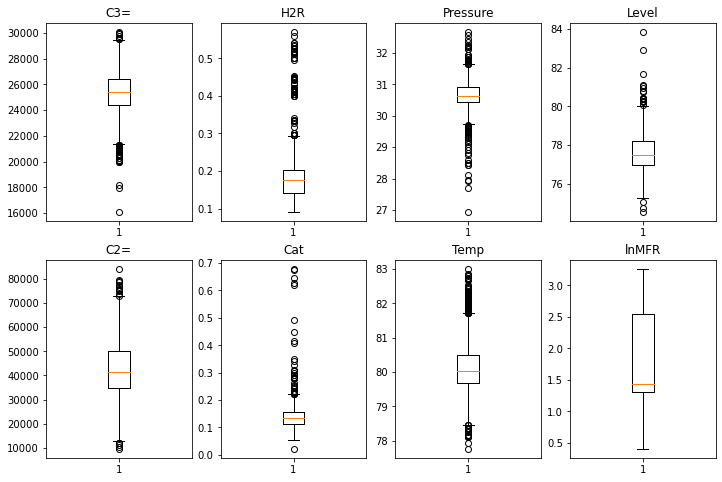

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
for i,c in enumerate(data.columns):
    if i<=7:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

Remove MFR and keep only ln(MFR) as `lnMFR`. You can delete a column `x` with `del data['x']`. 

In [6]:
del data['MFR']
data.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,1.193922


### Scale Data

Scale data with the Standard Scalar from scikit-learn.

```python
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
```

In [13]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
type(ds)

numpy.ndarray

The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [14]:
ds = pd.DataFrame(ds,columns=data.columns)
ds.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,lnMFR
0,-0.275813,-0.448905,-0.608709,2.183673,0.738905,0.618674,0.393138,-1.032139
1,0.127196,-0.448905,-0.337724,0.958317,-0.026235,-0.206091,-1.736289,-1.128004
2,0.217202,-0.448905,-0.750264,1.295911,0.249443,0.281795,-1.796108,-1.128004
3,-0.132429,-0.448905,0.548427,1.656195,0.048959,0.318882,-1.512875,-1.178208
4,-0.277378,-0.491991,0.032788,1.115873,-0.188252,-0.378416,-1.491054,-1.079345


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Divide Data

Data is divided into train and test sets to separate a fraction of the rows for evaluating classification or regression models. A typical split is 80% for training and 20% for testing, although the range depends on how much data is available and the objective of the study.

The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

```python
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
```

There are options such as `shuffle=True` to randomize the selection in each set. 

In [15]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
print(len(train),len(test))

1960 490


### Save Data

Save values that will be needed in the subsequent notebook.

In [16]:
import pickle
info = [data,train,test,ds,s]

with open('mfr_data.pkl', 'wb') as handle:
    pickle.dump(info, handle, protocol=pickle.HIGHEST_PROTOCOL)